In [140]:
import datetime as datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
import squarify


In [141]:
df = pd.read_csv('dataset_v1')
df.head(10)

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,802906,6,487,12198,2,30,6,5,t,...,False,False,False,False,False,False,False,False,False,3
1,1,28830,8,900,2812,2,10,8,7,o,...,False,False,False,False,False,False,False,False,False,2
2,2,94947,21,363,8973,2,10,5,5,t,...,False,False,False,False,False,False,False,False,False,3
3,3,590882,22,418,10694,2,10,6,5,t,...,False,False,False,False,False,False,False,False,False,2
4,4,201944,11,131,1488,3,30,8,9,t,...,False,False,False,False,False,False,False,False,False,3
5,5,333020,8,558,6089,2,10,9,5,t,...,False,False,False,False,False,False,False,False,False,2
6,6,728451,9,475,12066,2,25,3,4,n,...,False,False,False,False,False,False,False,False,False,3
7,7,475515,20,323,12236,2,0,8,6,t,...,False,False,False,False,False,False,False,False,False,1
8,8,441126,0,757,7219,2,15,8,6,t,...,False,False,False,False,False,False,False,False,False,2
9,9,989500,26,886,994,1,0,13,4,t,...,False,False,False,False,False,False,False,False,False,1


In [142]:
df['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [143]:
## Variables a analizar:
## foundation_type: tipo de cimientos usados cuando se construyó la edificación. Valores posibles: h, i, r, u, w.
##  “damage_grade”, que representa el nivel del daño que recibió la edificación
##ground_floor_type tipo de construcción usado en la planta baja cuando se construyó la edificación. Val: f, m, v, x, z.
##other_floor_type: tipo de construcción usado en otros pisos cuando se construyó la edificación (exceptuando el techo)
##      . Posibles valores: j, q, s, x.


In [144]:
tipoDeConstruccionYdanio=df[['damage_grade','foundation_type','ground_floor_type','other_floor_type']]
tipoDeConstruccionYdanio.head()

,damage_grade,foundation_type,ground_floor_type,other_floor_type
0,3,r,f,q
1,2,r,x,q
2,3,r,f,x
3,2,r,f,x
4,3,r,f,x


Text(0, 0.5, 'Cantidad')

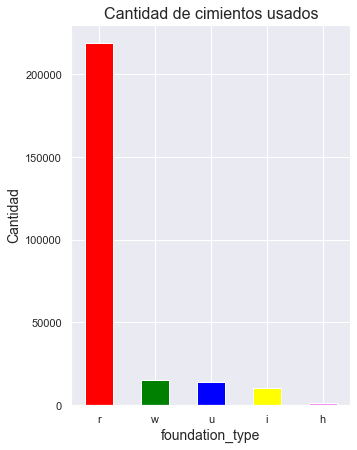

In [145]:
plt.figure(figsize=(5,7)) 
tipoDeConstruccionYdanio['foundation_type'].value_counts().plot(kind = 'bar', color = ['red' , 'green','blue','yellow','violet'])
plt.title('Cantidad de cimientos usados', size = 16)
plt.xlabel('foundation_type', size = 14)
plt.xticks(rotation=0)
plt.ylabel('Cantidad', size = 14)

Text(0, 0.5, 'Cantidad')

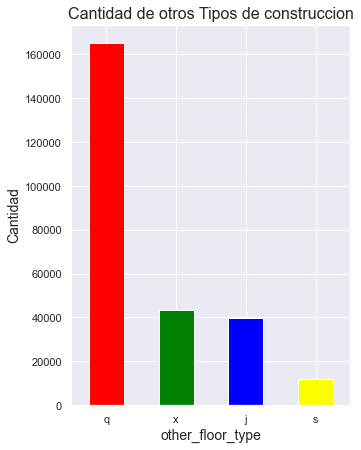

In [170]:
plt.figure(figsize=(5,7)) 
tipoDeConstruccionYdanio['other_floor_type'].value_counts().plot(kind = 'bar', color = ['red' , 'green','blue','yellow','violet'])
plt.title('Cantidad de otros Tipos de construccion', size = 16)
plt.xlabel('other_floor_type', size = 14)
plt.xticks(rotation=0)

plt.ylabel('Cantidad', size = 14)

Text(0, 0.5, 'Cantidad')

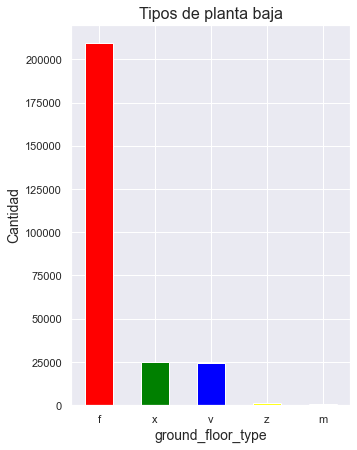

In [147]:
plt.figure(figsize=(5,7)) 
tipoDeConstruccionYdanio['ground_floor_type'].value_counts().plot(kind = 'bar', color = ['red' , 'green','blue','yellow','violet'])
plt.title('Tipos de planta baja', size = 16)
plt.xlabel('ground_floor_type', size = 14)
plt.xticks(rotation=0)

plt.ylabel('Cantidad', size = 14)

In [148]:
tipoDeConstruccionYdanio.head()

,damage_grade,foundation_type,ground_floor_type,other_floor_type
0,3,r,f,q
1,2,r,x,q
2,3,r,f,x
3,2,r,f,x
4,3,r,f,x


In [149]:
agrupadoXDamage = tipoDeConstruccionYdanio.groupby(['damage_grade','foundation_type']).agg({'foundation_type':['count']})
agrupadoXDamage.head()

foundation_type
                                       count
damage_grade foundation_type                
1            h                           358
             i                          6004
             r                         10720
             u                          3689
             w                          4353

In [150]:
agrupadoXDamage = agrupadoXDamage.unstack()
agrupadoXDamage.head()

foundation_type                          
                          count                          
foundation_type               h     i       r     u     w
damage_grade                                             
1                           358  6004   10720  3689  4353
2                           579  4354  125515  8541  9270
3                           511   221   82961  2030  1495

In [151]:
level1 = agrupadoXDamage.columns.get_level_values(1)
level2 = agrupadoXDamage.columns.get_level_values(2)
agrupadoXDamage.columns= level1 + '_' + level2
agrupadoXDamage =agrupadoXDamage.reset_index()
agrupadoXDamage.head()

,damage_grade,count_h,count_i,count_r,count_u,count_w
0,1,358,6004,10720,3689,4353
1,2,579,4354,125515,8541,9270
2,3,511,221,82961,2030,1495


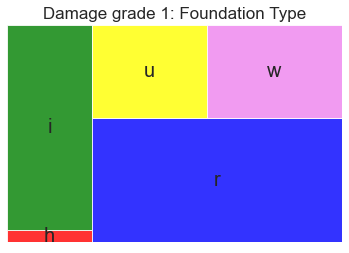

In [152]:

squarify.plot(sizes=agrupadoXDamage.loc[0].drop('damage_grade').values.flatten().tolist(),\
              label=['h','i','r','u','w'], color = ['red' , 'green','blue','yellow','violet'], alpha=.8,text_kwargs={'fontsize':20})
plt.axis('off')
plt.title('Damage grade 1: Foundation Type', size = 17)
plt.show()

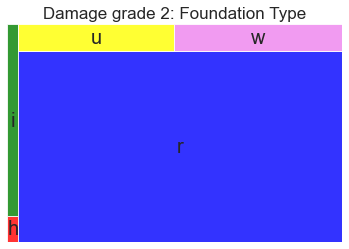

In [153]:
# plot it
squarify.plot(sizes=agrupadoXDamage.loc[1].drop('damage_grade').values.flatten().tolist(),\
              label=['h','i','r','u','w'], color = ['red' , 'green','blue','yellow','violet'], alpha=.8,text_kwargs={'fontsize':20})
plt.axis('off')
plt.title('Damage grade 2: Foundation Type', size = 17)
plt.show()

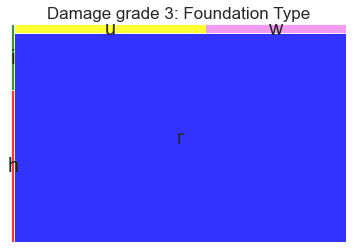

In [154]:
# plot it
squarify.plot(sizes=agrupadoXDamage.loc[2].drop('damage_grade').values.flatten().tolist(),\
              label=['h','i','r','u','w'], color = ['red' , 'green','blue','yellow','violet'], alpha=.8,text_kwargs={'fontsize':20})
plt.axis('off')
plt.title('Damage grade 3: Foundation Type', size = 17)
plt.show()

In [155]:
#other_floor_type
agrupadoXDamageOtherfloortype = tipoDeConstruccionYdanio.groupby(['damage_grade','other_floor_type']).agg({'other_floor_type':['count']})
agrupadoXDamageOtherfloortype.head(20)

other_floor_type
                                         count
damage_grade other_floor_type                 
1            j                            8886
             q                            7387
             s                            5423
             x                            3428
2            j                           20362
             q                           98320
             s                            5904
             x                           23673
3            j                           10595
             q                           59575
             s                             701
             x                           16347

In [156]:
agrupadoXDamageOtherfloortype = agrupadoXDamageOtherfloortype.unstack()
agrupadoXDamageOtherfloortype.head()

other_floor_type                    
                            count                    
other_floor_type                j      q     s      x
damage_grade                                         
1                            8886   7387  5423   3428
2                           20362  98320  5904  23673
3                           10595  59575   701  16347

In [157]:
level1 = agrupadoXDamageOtherfloortype.columns.get_level_values(1)
level2 = agrupadoXDamageOtherfloortype.columns.get_level_values(2)
agrupadoXDamageOtherfloortype.columns= level1 + '_' + level2
agrupadoXDamageOtherfloortype =agrupadoXDamageOtherfloortype.reset_index()
agrupadoXDamageOtherfloortype.head()

,damage_grade,count_j,count_q,count_s,count_x
0,1,8886,7387,5423,3428
1,2,20362,98320,5904,23673
2,3,10595,59575,701,16347


In [158]:
agrupadoXDamageOtherfloortype = agrupadoXDamageOtherfloortype.rename(columns={'damage_grade':'damage_grade','count_j':'j','count_q':'q','count_s':'s','count_x':'x'})
agrupadoXDamageOtherfloortype.head()

,damage_grade,j,q,s,x
0,1,8886,7387,5423,3428
1,2,20362,98320,5904,23673
2,3,10595,59575,701,16347


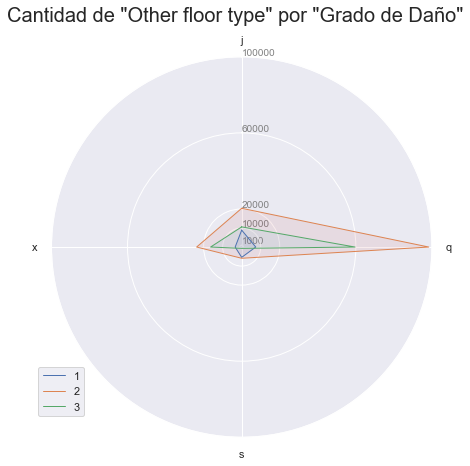

In [169]:
from math import pi

fig=plt.figure(figsize=(7,7))
 
categories=list(agrupadoXDamageOtherfloortype)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)

plt.yticks([1000,10000,20000,60000,100000],["1000","10000","20000","60000","100000"], color="grey", size=10)
plt.ylim(0,100000)
 
#damage_grade 1
values=agrupadoXDamageOtherfloortype.loc[0].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="1")
ax.fill(angles, values, 'b', alpha=0.1)
 
#damage_grade 2
values=agrupadoXDamageOtherfloortype.loc[1].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2")
ax.fill(angles, values, 'r', alpha=0.1)

#damage_grade 3
values=agrupadoXDamageOtherfloortype.loc[2].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="3")
ax.fill(angles, values, 'c', alpha=0.1)

plt.suptitle('Cantidad de "Other floor type" por "Grado de Daño"', fontsize=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.2));

In [160]:
#ground_floor_type
agrupadoXDamageGroundFloorType = tipoDeConstruccionYdanio.groupby(['damage_grade','ground_floor_type']).agg({'ground_floor_type':['count']})
agrupadoXDamageGroundFloorType.head(20)

ground_floor_type
                                           count
damage_grade ground_floor_type                  
1            f                             12474
             m                                90
             v                             10309
             x                              2052
             z                               199
2            f                            119877
             m                               343
             v                             12971
             x                             14536
             z                               532
3            f                             77268
             m                                75
             v                              1313
             x                              8289
             z                               273

In [161]:
agrupadoXDamageGroundFloorType = agrupadoXDamageGroundFloorType.unstack()
agrupadoXDamageGroundFloorType.head()

ground_floor_type                        
                              count                        
ground_floor_type                 f    m      v      x    z
damage_grade                                               
1                             12474   90  10309   2052  199
2                            119877  343  12971  14536  532
3                             77268   75   1313   8289  273

In [162]:
level1 = agrupadoXDamageGroundFloorType.columns.get_level_values(1)
level2 = agrupadoXDamageGroundFloorType.columns.get_level_values(2)
agrupadoXDamageGroundFloorType.columns= level1 + '_' + level2
agrupadoXDamageGroundFloorType =agrupadoXDamageGroundFloorType.reset_index()
agrupadoXDamageGroundFloorType.head()

,damage_grade,count_f,count_m,count_v,count_x,count_z
0,1,12474,90,10309,2052,199
1,2,119877,343,12971,14536,532
2,3,77268,75,1313,8289,273


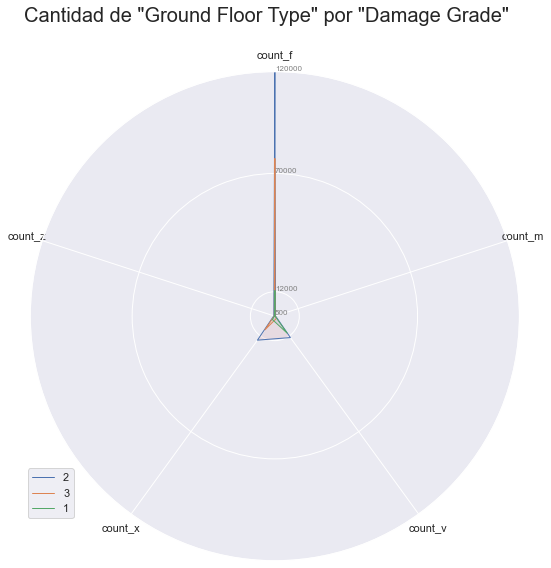

In [163]:
from math import pi

fig=plt.figure(figsize=(9,9))
 
categories=list(agrupadoXDamageGroundFloorType)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)

plt.yticks([500,12000,70000,120000],["500","12000","70000","120000"], color="grey", size=8)
plt.ylim(0,120000)
 
#damage_grade 2
values=agrupadoXDamageGroundFloorType.loc[1].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2")
ax.fill(angles, values, 'r', alpha=0.1) 
    
#damage_grade 3
values=agrupadoXDamageGroundFloorType.loc[2].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="3")
ax.fill(angles, values, 'c', alpha=0.1)       

#damage_grade 1
values=agrupadoXDamageGroundFloorType.loc[0].drop('damage_grade').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="1")
ax.fill(angles, values, 'b', alpha=0.1)

plt.suptitle('Cantidad de "Ground Floor Type" por "Damage Grade"', fontsize=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.2));

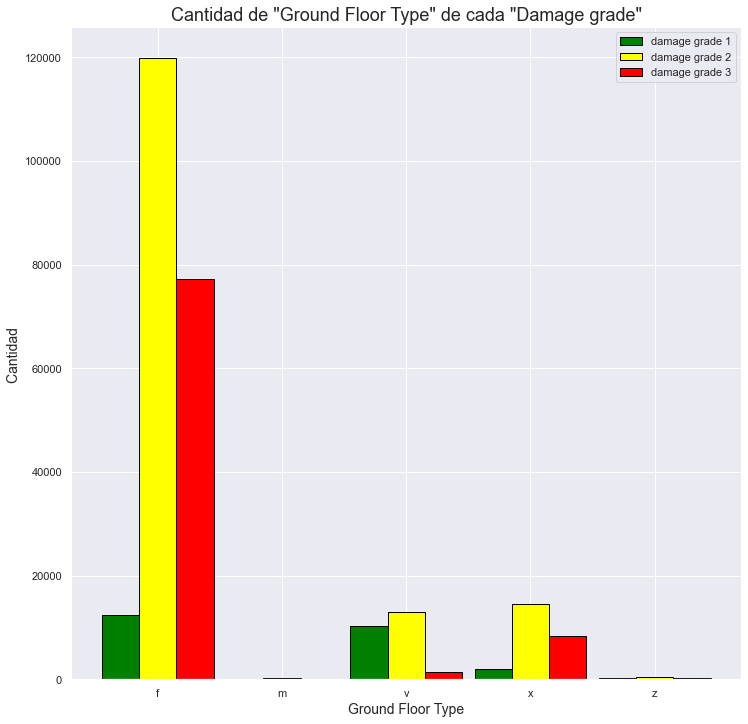

In [164]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12)) 
# width of the bars
barWidth = 0.3
 
bars1 = agrupadoXDamageGroundFloorType.loc[0].drop('damage_grade').values.flatten().tolist()
 
bars2 = agrupadoXDamageGroundFloorType.loc[1].drop('damage_grade').values.flatten().tolist()

bars3 = agrupadoXDamageGroundFloorType.loc[2].drop('damage_grade').values.flatten().tolist()
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, width = barWidth, color = 'green', edgecolor = 'black', capsize=7, label='damage grade 1')
 
plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', capsize=7, label='damage grade 2')

plt.bar(r3, bars3, width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label='damage grade 3')

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['f','m','v','x','z'])
plt.xlabel('Ground Floor Type', size = 14)
plt.ylabel('Cantidad ', size = 14)
plt.title('Cantidad de "Ground Floor Type" de cada "Damage grade"', size = 18)
plt.legend()
 
# Show graphic
plt.show()